<a href="https://colab.research.google.com/github/anjusaji12/INTERNSHIP/blob/main/MNIST_Handwritten_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load MNIST dataset (Hand written digits dataset)

* Train DNN and experiment with different number of layers and neurons.

* Now train the DNN with only two class from the dataset (A binary classifier using DNN)

* Apply Normalization to the image data and then train, and analyze the improvement.

*Search and find the code/solution and solve errors. Do not use any Copilot

Content

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

Four files are available:

* train-images-idx3-ubyte.gz: training set images (9912422 bytes)

* train-labels-idx1-ubyte.gz: training set labels (28881 bytes)

* t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)

* t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MNIST Handwritten dataset

(train_images, train_labels) ,(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#check the shape of the data

print("Training image size:",train_images.shape)


Training image size: (60000, 28, 28)


In [4]:
print('Test image size:',test_images.shape)

Test image size: (10000, 28, 28)


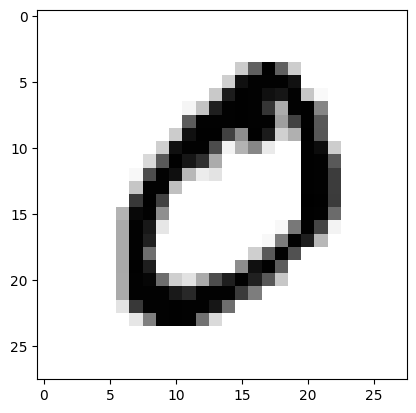

In [5]:
#display one sample

plt.imshow(train_images[1],cmap='binary')
plt.show()


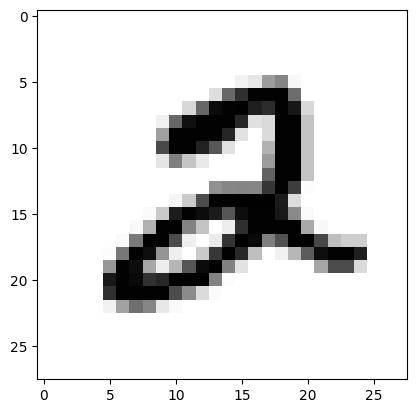

In [6]:
plt.imshow(train_images[5],cmap='binary')
plt.show()

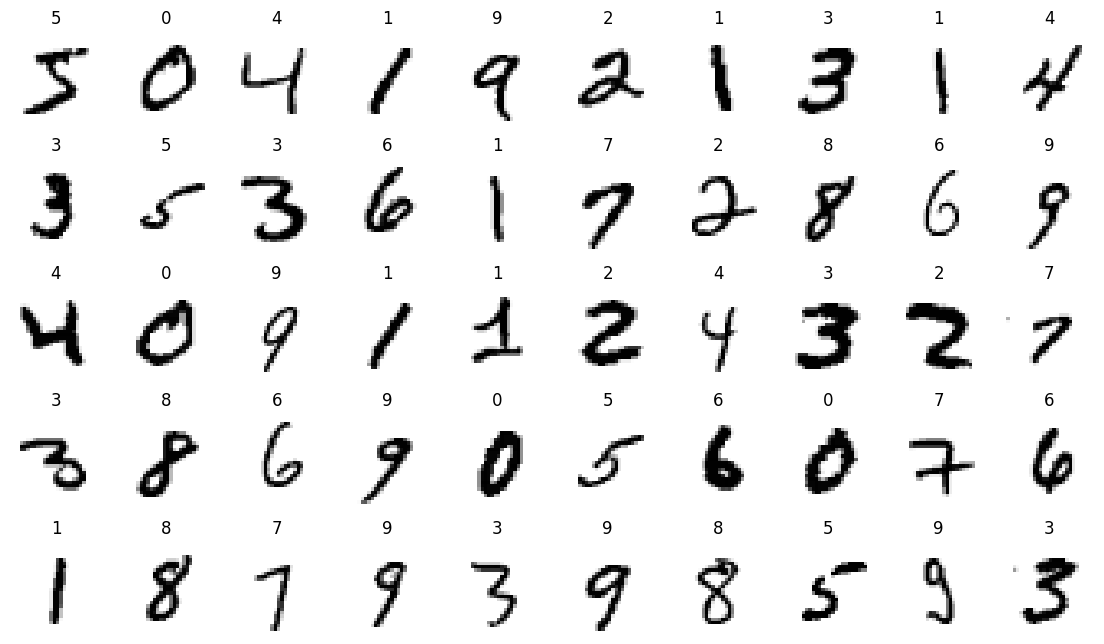

In [7]:
#visualize multiple images
cls_name = [0,1,2,3,4,5,6,7,8,9]
n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col #picks which image to show
    plt.subplot(n_rows,n_cols,index + 1)
    plt.imshow(train_images[index],cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(cls_name[train_labels[index]])


* Train DNN and experiment with different number of layers and neurons.

In [8]:
DNN =keras.Sequential() #intiate the model
DNN.add(keras.layers.Flatten(input_shape = [28,28])) #input layer
DNN.add(keras.layers.Dense(500,activation='relu'))
DNN.add(keras.layers.Dense(300,activation='relu'))
DNN.add(keras.layers.Dense(100,activation='relu'))
DNN.add(keras.layers.Dense(10,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
DNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
tbcallback = keras.callbacks.TensorBoard(log_dir ='tbGraph/')

In [11]:
history_DNN = DNN.fit(train_images,train_labels,epochs=10,validation_split=0.1,callbacks=[tbcallback])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8352 - loss: 4.2074 - val_accuracy: 0.9510 - val_loss: 0.1797
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9452 - loss: 0.2013 - val_accuracy: 0.9625 - val_loss: 0.1289
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9581 - loss: 0.1525 - val_accuracy: 0.9655 - val_loss: 0.1243
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9652 - loss: 0.1255 - val_accuracy: 0.9690 - val_loss: 0.1124
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9705 - loss: 0.1052 - val_accuracy: 0.9693 - val_loss: 0.1104
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9746 - loss: 0.0909 - val_accuracy: 0.9673 - val_loss: 0.1374
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9774 - loss: 0.0825 - val_accuracy: 0.9700 - val_loss: 0.1056
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9793 -

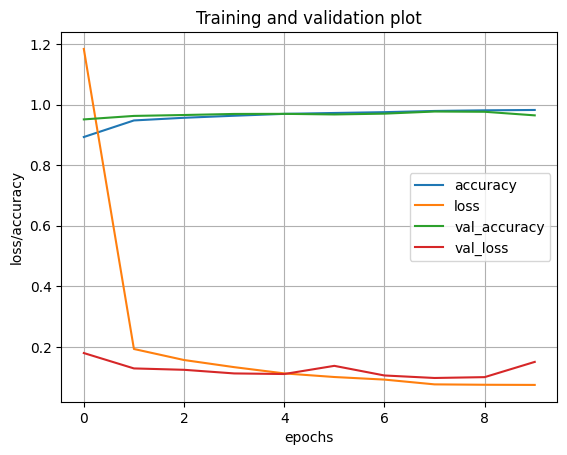

In [12]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('Training and validation plot')
plt.show()

In [13]:
#test model accuracy
test_loss,test_accuracy = DNN.evaluate(test_images,test_labels)
print("Test loss:",test_loss)
print('Test accuracy:',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9566 - loss: 0.1746
Test loss: 0.1683262139558792
Test accuracy: 0.9595000147819519


* Now train the DNN with only two class from the dataset (A binary classifier using DNN)

In [46]:
#Choose two classes, e.g., 0 and 1
class_0 = 0
class_1 = 1

#filter training data

train_image_filtered = (train_labels == class_0) | (train_labels == class_1)  #label training set as 0 or 1
train_image_binary = train_images[train_image_filtered]  #traing image will be changed to filtered image
train_labels_binary = train_labels[train_image_filtered]

#filter testing data
test_image_filter = (test_labels == 0) | (test_labels == class_1)
test_image_binary = test_images[test_image_filter]
test_label_binary = test_labels[test_image_filter]

In [42]:
# Relabel Classes (0 and 1)

train_image_binary = (train_image_binary == class_1).astype(int)
test_image_binary = (test_image_binary == class_1).astype(int)

In [36]:
train_image_binary.shape

(12665, 28, 28)

In [43]:
test_image_binary.shape

(2115, 28, 28)

In [38]:
train_labels_binary.shape

(12665,)

In [19]:
test_label_binary.shape

(2115,)

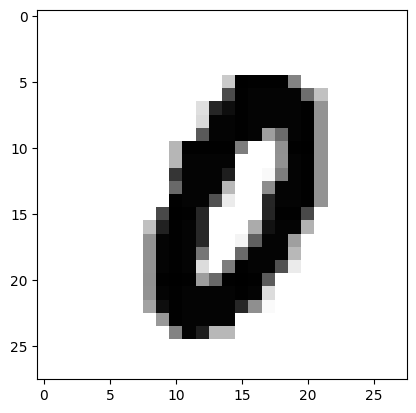

In [47]:
#display one image
plt.imshow(train_image_binary[8],cmap='binary')
plt.show()

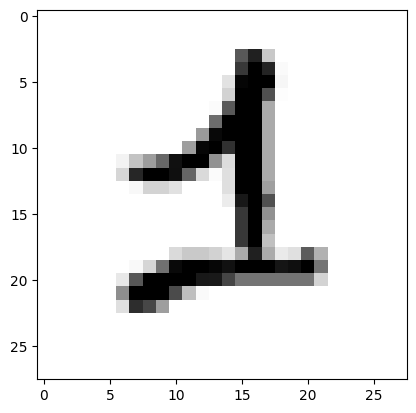

In [48]:
plt.imshow(train_image_binary[7],cmap='binary')
plt.show()

In [49]:
class_name = [0,1]
n_rows = 5
n_col = 2
plt.figure(figsize = (n_col * 1.4, n_rows *1.6))

<Figure size 280x800 with 0 Axes>

<Figure size 280x800 with 0 Axes>

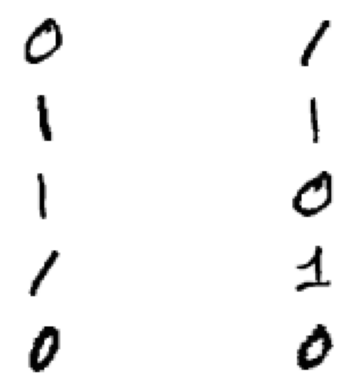

In [50]:
for row in range(n_rows):
  for col in range(n_col):
      index = n_col * row + col
      plt.subplot(n_rows,n_col,index+1)
      plt.imshow(train_image_binary[index],cmap='binary')
      plt.axis('off')


In [24]:
DNN_binary= keras.models.Sequential()
DNN_binary.add(keras.layers.Flatten(input_shape=[28,28]))
DNN_binary.add(keras.layers.Dense(300,activation='relu'))
DNN_binary.add(keras.layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
DNN_binary.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
tbcallbacks = keras.callbacks.TensorBoard(log_dir = 'tbGraph/')

In [27]:
hist_DNN_binary = DNN_binary.fit(train_image_binary,train_labels_binary,epochs=10,validation_split=0.1,callbacks=[tbcallbacks])

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5796 - loss: 0.6808 - val_accuracy: 0.6030 - val_loss: 0.6521
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6172 - loss: 0.6384 - val_accuracy: 0.6069 - val_loss: 0.6450
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6222 - loss: 0.6258 - val_accuracy: 0.6054 - val_loss: 0.6396
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6228 - loss: 0.6200 - val_accuracy: 0.6077 - val_loss: 0.6408
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6214 - loss: 0.6172 - val_accuracy: 0.6109 - val_loss: 0.6430
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6228 - loss: 0.6127 - val_accuracy: 0.6046 - val_loss: 0.6444
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6267 - loss: 0.6147 - val_accuracy: 0.6062 - val_loss: 0.6477
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6269 - loss: 0.6100 - val_accuracy: 0.

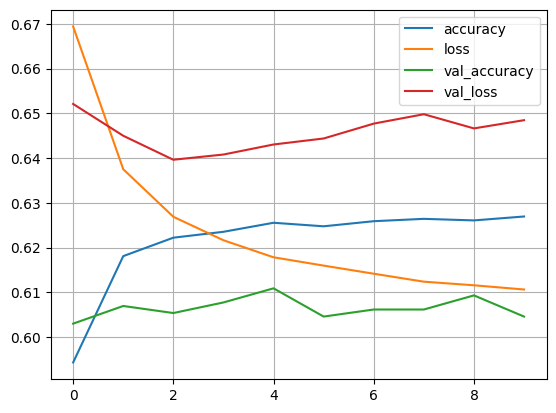

In [28]:
import pandas as pd
pd.DataFrame(hist_DNN_binary.history).plot()
plt.grid(True)
plt.show()

In [29]:
test_binary_loss,test_binary_accuracy = DNN_binary.evaluate(test_image_binary,test_label_binary)
print('loss:',test_binary_loss)
print('accuracy:',test_binary_accuracy)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - loss: 0.6405
loss: 0.6464095115661621
accuracy: 0.624586284160614


 * Apply Normalization to the image data and then train, and analyze the improvement.

Normalizing image data involves scaling pixel intensity values to a specific range, typically between 0 and 1

1: Min-max scaling

 This method scales the pixel values of an image to a specific range, most commonly \([0,1]\) or \([-1,1]\).

 It is simple to implement and guarantees a fixed input range for your model.

  The formula for scaling to the range \([0,1]\) is:

 x' = ( x - min(x) ) / [ max(x) - min(x) ]

2: standardization

 This method rescales pixel values to have a mean of 0 and a standard deviation of 1.

 It is more robust to outliers than min-max scaling because extreme values do not compress the range of other data points.

The formula is:

x' = x - mean(x) / std(x)

In [53]:
#applying standardization

x_mean = train_images . mean()
x_std = train_images.std()

train_image_stand = train_images - x_mean / (x_std)
test_image_stand = test_images - x_mean /(x_std)

In [56]:
hist_stand_DNN = DNN.fit(train_images,train_labels,epochs=10,validation_split=0.1,callbacks=[[tbcallback]])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9818 - loss: 0.0686 - val_accuracy: 0.9782 - val_loss: 0.0872
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9859 - loss: 0.0554 - val_accuracy: 0.9753 - val_loss: 0.1169
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9870 - loss: 0.0548 - val_accuracy: 0.9815 - val_loss: 0.0927
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9886 - loss: 0.0503 - val_accuracy: 0.9765 - val_loss: 0.1142
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9898 - loss: 0.0473 - val_accuracy: 0.9772 - val_loss: 0.1233
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9894 - loss: 0.0446 - val_accuracy: 0.9770 - val_loss: 0.1496
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9899 - loss: 0.0500 - val_accuracy: 0.9797 - val_loss: 0.1027
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9904 -